In [1]:
from ucimlrepo import fetch_ucirepo 
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
nursery = fetch_ucirepo(id=76) 

X = nursery.data.features 
y = nursery.data.targets

In [3]:
nursery_dataframe = pd.concat([X, y], axis=1)

display(nursery_dataframe)

,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
...,...,...,...,...,...,...,...,...,...
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,spec_prior
12956,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,not_recom
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,spec_prior
12958,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,spec_prior


# One-hot encoding #

In [4]:
# Copia del dataframe originale
nursery_dataframe_old = nursery_dataframe.copy()
onehot_cols = nursery_dataframe.columns.to_list()[:-1]

#Label encoding
labelenc_class = LabelEncoder()
labelenc_class.fit(nursery_dataframe['class'].values)
nursery_dataframe['class'] = labelenc_class.transform(nursery_dataframe['class'].values)

#for i, class_name in enumerate(labelenc_class.classes_):
#    print(f"Classe {i} → {class_name}")

# One-hot encoding
nursery_dataframe = pd.get_dummies(nursery_dataframe, columns=onehot_cols)

#nursery_dataframe.to_csv("nursery_dataframe.csv", index=False)

display(nursery_dataframe)

,class,parents_great_pret,parents_pretentious,parents_usual,has_nurs_critical,has_nurs_improper,has_nurs_less_proper,has_nurs_proper,has_nurs_very_crit,form_complete,...,housing_critical,housing_less_conv,finance_convenient,finance_inconv,social_nonprob,social_problematic,social_slightly_prob,health_not_recom,health_priority,health_recommended
0,2,False,False,True,False,False,False,True,False,True,...,False,False,True,False,True,False,False,False,False,True
1,1,False,False,True,False,False,False,True,False,True,...,False,False,True,False,True,False,False,False,True,False
2,0,False,False,True,False,False,False,True,False,True,...,False,False,True,False,True,False,False,True,False,False
3,2,False,False,True,False,False,False,True,False,True,...,False,False,True,False,False,False,True,False,False,True
4,1,False,False,True,False,False,False,True,False,True,...,False,False,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12955,3,True,False,False,False,False,False,False,True,False,...,True,False,False,True,False,False,True,False,True,False
12956,0,True,False,False,False,False,False,False,True,False,...,True,False,False,True,False,False,True,True,False,False
12957,3,True,False,False,False,False,False,False,True,False,...,True,False,False,True,False,True,False,False,False,True
12958,3,True,False,False,False,False,False,False,True,False,...,True,False,False,True,False,True,False,False,True,False


In [5]:
X = nursery_dataframe.iloc[:,1:].values
y = nursery_dataframe['class'].values

In [6]:
random_state = 45
np.random.seed(random_state)

test_p = 0.5

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_p, random_state=random_state, shuffle=True, stratify = y)

display(pd.DataFrame({'X_trainval': X_trainval.shape, 'X_test': X_test.shape}, index=['N. sanmples', 'N.features']))

,X_trainval,X_test
N. sanmples,6480,6480
N.features,27,27


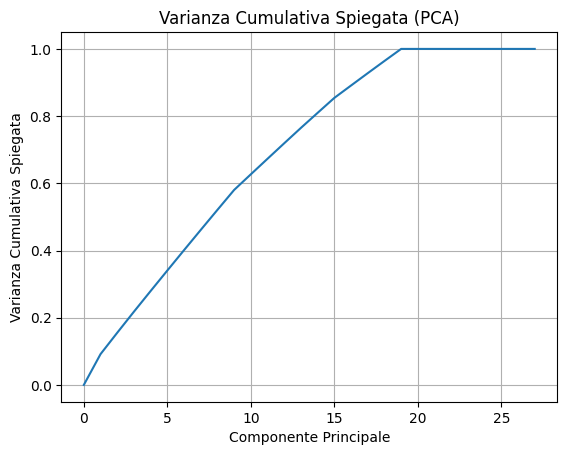

In [7]:
# Inizializzazione oggetto PCA
explvar_p = 0.9
pca = PCA(n_components=explvar_p)

# "Fit" dell'oggetto PCA
X_trainval_pca = pca.fit_transform(X_trainval)
X_test_pca = pca.transform(X_test)

# PCA per il grafico
pca_graph = PCA()
pca_graph.fit(X_trainval)

# Calcoliamo la varianza spiegata cumulativa
expld_variance = np.insert(np.cumsum(pca_graph.explained_variance_ratio_), 0, 0)

# Creiamo il grafico della varianza cumulativa
plt.figure()
plt.plot(expld_variance)
plt.title('Varianza Cumulativa Spiegata (PCA)')
plt.xlabel('Componente Principale')
plt.ylabel('Varianza Cumulativa Spiegata')

plt.grid()
plt.show()

# Grafico LDA 2-D su dati originali e su dati PCA-ridotti #

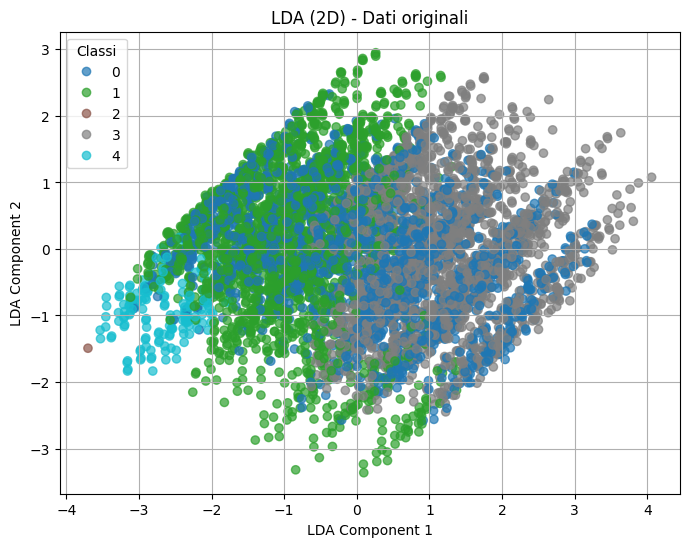

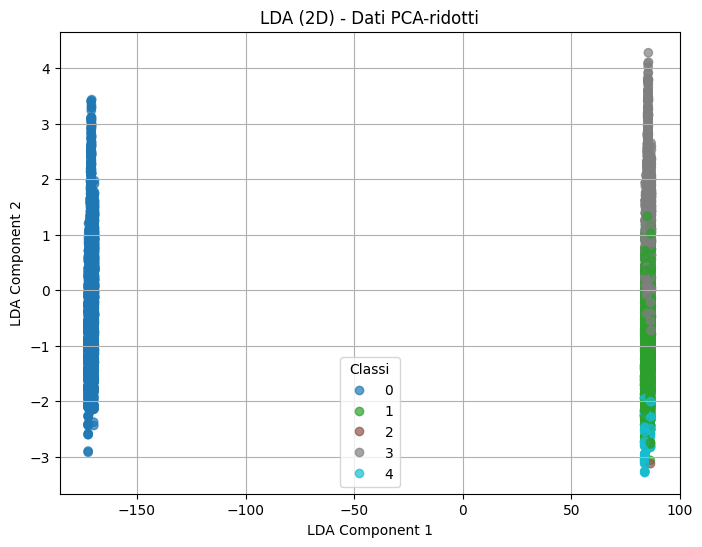

In [8]:
lda_vis = LDA(n_components=2)
X_lda_2d = lda_vis.fit_transform(X_trainval, y_trainval)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_lda_2d[:, 0], X_lda_2d[:, 1], c=y_trainval, cmap='tab10', alpha=0.7)
plt.title("LDA (2D) - Dati originali")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.legend(*scatter.legend_elements(), title="Classi")
plt.grid(True)
plt.show()

lda_vis_pca = LDA(n_components=2)
X_lda_2d_pca = lda_vis_pca.fit_transform(X_trainval_pca, y_trainval)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_lda_2d_pca[:, 0], X_lda_2d_pca[:, 1], c=y_trainval, cmap='tab10', alpha=0.7)
plt.title("LDA (2D) - Dati PCA-ridotti")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.legend(*scatter.legend_elements(), title="Classi")
plt.grid(True)
plt.show()

# Grafici LDA 3D per i dati originali e per quelli PCA-ridotti

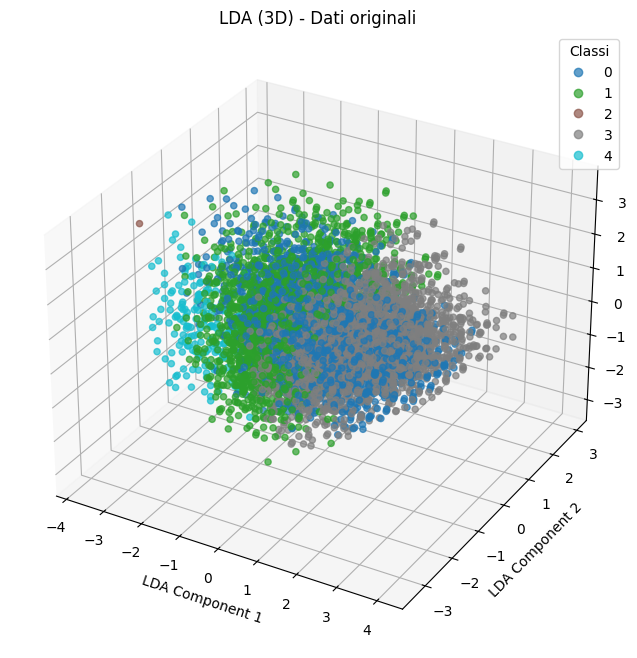

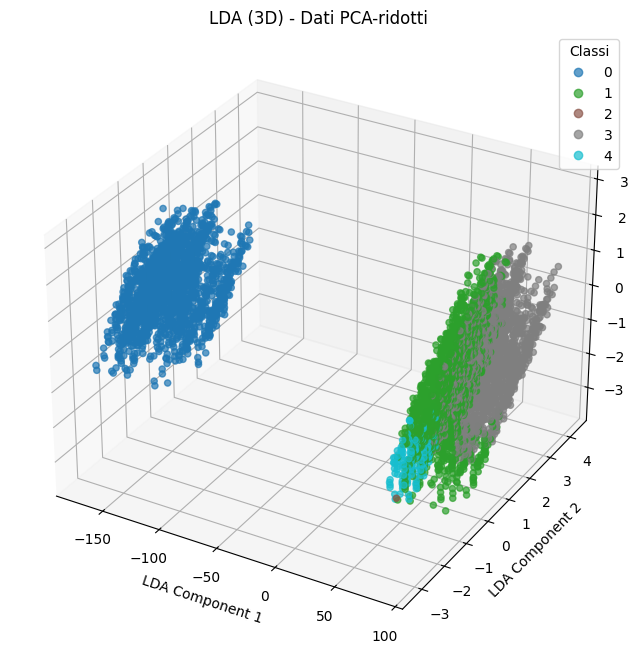

In [9]:
lda_3d = LDA(n_components=3)
X_lda_3d = lda_3d.fit_transform(X_trainval, y_trainval)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_lda_3d[:, 0], X_lda_3d[:, 1], X_lda_3d[:, 2], 
                     c=y_trainval, cmap='tab10', alpha=0.7)
ax.set_title("LDA (3D) - Dati originali")
ax.set_xlabel("LDA Component 1")
ax.set_ylabel("LDA Component 2")
ax.set_zlabel("LDA Component 3")
legend = ax.legend(*scatter.legend_elements(), title="Classi", loc="best")
plt.show()

lda_3d_pca = LDA(n_components=3)
X_lda_3d_pca = lda_3d_pca.fit_transform(X_trainval_pca, y_trainval)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_lda_3d_pca[:, 0], X_lda_3d_pca[:, 1], X_lda_3d_pca[:, 2], 
                     c=y_trainval, cmap='tab10', alpha=0.7)
ax.set_title("LDA (3D) - Dati PCA-ridotti")
ax.set_xlabel("LDA Component 1")
ax.set_ylabel("LDA Component 2")
ax.set_zlabel("LDA Component 3")
legend = ax.legend(*scatter.legend_elements(), title="Classi", loc="best")
plt.show()

# LDA come classificatore

In [10]:
#LDA sui dati ridotti dalla PCA
lda = LDA()
lda_pca = LDA()

lda.fit(X_trainval, y_trainval)
lda_pca.fit(X_trainval_pca, y_trainval)

y_pred = lda.predict(X_test)
y_pred_pca = lda_pca.predict(X_test_pca)

y_pred_proba = lda.predict_proba(X_test)
y_pred_pca_proba = lda_pca.predict_proba(X_test_pca)

scores_dict = {'Training Set': lda.score(X_trainval, y_trainval), 'Test Set': lda.score(X_test, y_test)}
scores = pd.DataFrame(scores_dict, index=['Accuracy'])

scores_dict_pca = {'Training Set': lda_pca.score(X_trainval_pca, y_trainval), 'Test Set': lda_pca.score(X_test_pca, y_test)}
scores_pca = pd.DataFrame(scores_dict_pca, index=['Accuracy_pca'])

y_pred_df = pd.DataFrame({'Pred. Class': y_pred, 
                          'P(Class 0) - %': np.round(y_pred_proba[:, 0] * 100, decimals=2), 
                          'P(Class 1) - %': np.round(y_pred_proba[:, 1] * 100, decimals=2), 
                          'P(Class 2) - %': np.round(y_pred_proba[:, 2] * 100, decimals=2),
                          'P(Class 3) - %': np.round(y_pred_proba[:, 3] * 100, decimals=2),
                          'P(Class 4) - %': np.round(y_pred_proba[:, 4] * 100, decimals=2)})
y_pred_df_pca = pd.DataFrame({'Pred_pca. Class': y_pred_pca, 
                          'P(Class 0) - %': np.round(y_pred_pca_proba[:, 0] * 100, decimals=2), 
                          'P(Class 1) - %': np.round(y_pred_pca_proba[:, 1] * 100, decimals=2), 
                          'P(Class 2) - %': np.round(y_pred_pca_proba[:, 2] * 100, decimals=2),
                          'P(Class 3) - %': np.round(y_pred_pca_proba[:, 3] * 100, decimals=2),
                          'P(Class 4) - %': np.round(y_pred_pca_proba[:, 4] * 100, decimals=2)})

display(scores)
display(scores_pca)

display(y_pred_df)
display(y_pred_df_pca)

print(f"Numero di componenti principali selezionate: {pca.n_components_}")

,Training Set,Test Set
Accuracy,0.550772,0.539815


,Training Set,Test Set
Accuracy_pca,0.861111,0.85216


,Pred. Class,P(Class 0) - %,P(Class 1) - %,P(Class 2) - %,P(Class 3) - %,P(Class 4) - %
0,3,15.94,1.78,0.0,82.27,0.00
1,1,28.54,66.86,0.0,2.19,2.40
2,0,44.99,20.25,0.0,34.60,0.15
3,3,16.21,1.74,0.0,82.05,0.00
4,1,25.71,71.18,0.0,1.99,1.11
...,...,...,...,...,...,...
6475,1,36.67,56.24,0.0,6.93,0.16
6476,3,42.88,13.44,0.0,43.58,0.10
6477,1,40.31,47.14,0.0,12.53,0.02
6478,3,37.71,10.45,0.0,51.81,0.03


,Pred_pca. Class,P(Class 0) - %,P(Class 1) - %,P(Class 2) - %,P(Class 3) - %,P(Class 4) - %
0,3,0.0,17.00,0.0,82.99,0.01
1,1,0.0,90.48,0.0,4.87,4.65
2,3,0.0,39.42,0.0,59.96,0.62
3,3,0.0,2.58,0.0,97.42,0.00
4,1,0.0,93.26,0.0,4.80,1.94
...,...,...,...,...,...,...
6475,1,0.0,85.27,0.0,14.34,0.39
6476,3,0.0,23.28,0.0,76.37,0.34
6477,1,0.0,68.00,0.0,31.97,0.04
6478,1,0.0,58.24,0.0,40.57,1.20


Numero di componenti principali selezionate: 17
